#          Email Spam

---


#About Dataset


---

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

#Objective

---



 The objective of this project is to develop a machine learning model capable of accurately classifying SMS messages as either "spam" or "ham" (legitimate). By leveraging state-of-the-art natural language processing techniques and machine learning algorithms, our aim is to create a robust and effective SMS spam detection system that enhances user communication experiences by filtering out unwanted and potentially harmful messages.


The project will involve data preprocessing, feature extraction, model training, and rigorous evaluation to achieve a high level of accuracy in identifying spam messages while minimizing false positives and false negatives.


#Approach

---



---



1.   Load the data and load all the libraries
2.   Data Preparation and Data transformation
     1. Convert all text into LowerCase
     2. Remove all special characters
     3. Remove stop words
     4. Lemmatization and Stemming
3.   Vectorization
     1. TFIDF Vectorizer
4.   Machine Learning and also Deep Learning


---




#Load the Data and The Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns

In [2]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

#EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df['Unnamed: 2'].value_counts()

,count
Unnamed: 2,
"bt not his girlfrnd... G o o d n i g h t . . .@""",3
PO Box 5249,2
"this wont even start........ Datz confidence..""",2
GN,2
"don't miss ur best life for anything... Gud nyt...""",2
"but dont try to prove it..\"" .Gud noon....""",2
"Gud night....""",1
"like you are the KING\""...! OR \""Walk like you Dont care",1
HAD A COOL NYTHO,1


In [6]:
df['Unnamed: 3'].value_counts()

,count
Unnamed: 3,
"MK17 92H. 450Ppw 16""",2
GE,2
why to miss them,1
"U NO THECD ISV.IMPORTANT TOME 4 2MORO\""""",1
i wil tolerat.bcs ur my someone..... But,1
"ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""""",1
"whoever is the KING\""!... Gud nyt""",1
TX 4 FONIN HON,1
"\""OH No! COMPETITION\"". Who knew",1


#Delete unwanted columns

In [7]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

#Checking for null values

In [8]:
df.isnull().sum()

,0
v1,0
v2,0


In [9]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df['v1'].value_counts()

,count
v1,
ham,4825
spam,747


#1. Convert all the text into Lowercase
#2. Remove all the special characters
#3. Remove all the stop words
#4. Lemmatization and Stemming

In [11]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [12]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [13]:
df['v2']=df['v2'].map(lambda s:preprocess(s))


In [14]:
df.head()

,v1,v2
0,ham,jurong point crazy available bugis great world...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts may te...
3,ham,dun say early hor already say
4,ham,nah think goes usf lives around though


# Vectorization -TFIDF vector

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vect=TfidfVectorizer()

In [17]:
x=vect.fit_transform(df['v2'])
x.shape

(5572, 7386)

#Data Encoding and Data Splitting


In [18]:
le=LabelEncoder()

In [19]:
y=le.fit_transform(df['v1'])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 7386)
(1115, 7386)
(4457,)
(1115,)


In [22]:
x.data

array([0.36750082, 0.28744258, 0.28460409, ..., 0.48395639, 0.53118971,
       0.69543059])

#Random Forest


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [24]:
random_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],

               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [25]:
rf=RandomForestClassifier()
clf=RandomizedSearchCV(estimator=rf ,param_distributions=random_grid,verbose=2,random_state=142)


In [26]:
search=clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   2.3s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   2.3s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   2.2s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   2.2s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   3.4s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   1.1s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.9s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=  

In [27]:
search.best_params_

{'n_estimators': 130,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 80,
 'criterion': 'gini'}

In [28]:
search.best_score_

0.9744200852571556

In [29]:

rf = RandomForestClassifier(n_estimators=130,
 min_samples_split=10,
 min_samples_leaf = 1,
 max_depth= None,
criterion= 'gini')

In [30]:

rf.fit(x_train.toarray(),y_train)
rf_preds_train = rf.predict(x_train.toarray())
rf_preds_test = rf.predict(x_test.toarray())

In [47]:
print('Accuracy score for train data : ', round(accuracy_score(y_train, rf_preds_train),2))
print('Accuracy score for test data : ', round(accuracy_score(y_test, rf_preds_test),2))
print('Confusion matrix of the model is: \n', confusion_matrix(y_test, rf_preds_test))
print(f'Classification report of the model is: \n', classification_report(y_test, rf_preds_test))


Accuracy score for train data :  1.0
Accuracy score for test data :  0.98
Confusion matrix of the model is: 
 [[982   0]
 [ 23 110]]
Classification report of the model is: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       982
           1       1.00      0.83      0.91       133

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



<Axes: >

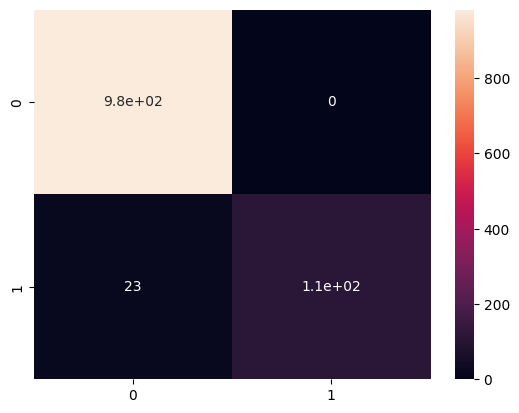

In [54]:
sns.heatmap(confusion_matrix(y_test, rf_preds_test), annot=True)

#MultinomialNB

In [32]:
nb=GaussianNB()
nb.fit(x_train.toarray(),y_train)
nb_preds_train=nb.predict(x_train.toarray())
nb_preds_test=nb.predict(x_test.toarray())

In [33]:
print('Accuracy score of the model is: ', round(accuracy_score(y_train, nb_preds_train),2))
print('Accuracy score of the model is: ', round(accuracy_score(y_test, nb_preds_test),2))
print('Confusion matrix of the model is: ', confusion_matrix(y_test, nb_preds_test))
print('Classification report of the model is: ', classification_report(y_test, nb_preds_test))

Accuracy score of the model is:  0.93
Accuracy score of the model is:  0.88


#Support Vector Machine

In [34]:
from sklearn.svm import SVC

svc = SVC()

In [35]:
from scipy.stats import reciprocal, randint
param_dist = {
    'C': reciprocal(0.1, 10),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'] + list(reciprocal(0.01, 0.1).rvs(size=3)),  # Kernel coefficient for 'poly', 'rbf', 'sigmoid'
    'degree': randint(2, 5),  # Degree of the polynomial kernel function
    'coef0': reciprocal(0.1, 10)  # Independent term in kernel function
}



In [36]:
random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)


In [41]:
search1 = random_search.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:

search1.best_params_

In [ ]:
svc = SVC(C= 0.3321408221627493,
 coef0=6.852383815557032,
 degree= 2,
 gamma= 'scale',
 kernel= 'linear')

In [ ]:

svc.fit(x_train.toarray(),y_train)
svc_preds_train = svc.predict(x_train.toarray())
svc_preds_test = svc.predict(x_test.toarray())

In [ ]:
print('Accuracy score for train data : ', round(accuracy_score(y_train, svc_preds_train),2))
print('Accuracy score for test data : ', round(accuracy_score(y_test, svc_preds_test),2))


#Creating App using Gradio


In [38]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [39]:
import gradio as gr

In [55]:
def transform(input_text):
    transformed_input = preprocess(input_text)
    vectorized_input = vect.transform([transformed_input])
    result = rf.predict_proba(vectorized_input)[0]
    return {"ham": float(result[0]), "spam": float(result[1])}

# Define the Gradio interface
demo = gr.Interface(
    fn=transform,
    inputs=gr.Textbox(),
    outputs='label'
)

# Launch the interface
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fc7c90201802a2eabb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
